In [14]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from math import sqrt

from random import seed
from random import random
from random import randint
from random import sample
import matplotlib.lines as lines 
import numpy as np

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R =  .5 + 0.3*random()  ##.05 + 0.15*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0

        # adam parameters
        self.m_dw = [0 for _ in range(n_inputs)] 
        self.v_dw = [0 for _ in range(n_inputs)] 
        self.m_dR = 0 
        self.v_dR = 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.eta = 0.01        
        
        
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        new_neuron.dR = self.dR
        new_neuron.dw = self.dw.copy()
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self, Ct, m_st):
        if self.output < .5 and self.C != Ct:
            return
        
        if self.output < .5 and m_st:
            return
        
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        #print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        
    def update_weights_adam(self, l_rate, t):
        for j in range(len(self.weights)):
            self.m_dw[j] = self.beta1*self.m_dw[j] + (1-self.beta1)*self.dw[j]
        # *** biases *** #
        self.m_dR = self.beta1*self.m_dR + (1-self.beta1)*self.dR

        ## rms beta 2
        # *** weights *** #
        for j in range(len(self.weights)):
            self.v_dw[j] = self.beta2*self.v_dw[j] + (1-self.beta2)*(self.dw[j]**2)
        # *** biases *** #
        self.v_dR = self.beta2*self.v_dR + (1-self.beta2)*(self.dR**2)

        ## bias correction
        m_dw_corr = [0 for _ in range(len(self.weights))] 
        v_dw_corr = [0 for _ in range(len(self.weights))] 
        for j in range(len(self.weights)):
            m_dw_corr[j] = self.m_dw[j]/(1-self.beta1**t)
        m_dR_corr = self.m_dR/(1-self.beta1**t)
        for j in range(len(self.weights)):
            v_dw_corr[j] = self.v_dw[j]/(1-self.beta2**t)
        v_dR_corr = self.v_dR/(1-self.beta2**t)
        
        for j in range(len(self.weights)):
            self.weights[j] -= self.eta*(m_dw_corr[j]/(np.sqrt(v_dw_corr[j])+self.epsilon))
        self.R -= self.eta*(m_dR_corr/(np.sqrt(v_dR_corr)+self.epsilon))
        
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        #print ("update :", self.inputs)
        for j in range(len(self.weights)):
            #print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] -= l_rate * self.dw[j]/dH
            
        #print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R -= l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0

    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
                
        
class neuron_l():
    
    def __init__(self, n_inputs,c, o):
        self.mode = "L"
        self.C = c
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() -.5 for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random() - .5
        #s1 = sqrt(sum([x**2 for x in self.weights]))
        #self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
        # adam parameters
        self.m_dw = [0 for _ in range(n_inputs)] 
        self.v_dw = [0 for _ in range(n_inputs)] 
        self.m_dA = 0 
        self.v_dA = 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.eta = 0.01        
        
        
    def copy (self):
        new_neuron = neuron_l(len(self.inputs),  self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        new_neuron.dA = self.dA
        new_neuron.dw = self.dw.copy()
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        #print (self.C,"activate    ", self.weights, self.A, ":", self.inputs,"==>", activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        #print (self.C,"transfer    ", activation,"==>", self.output)
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A, self.C,":",self.inputs, self.output)

    def calculate_update(self, Ct, m_st):
        #print (self.C,"calc_delta    ",self.dw, self.dA ,"==>", )
        for j in range(len(self.weights)):
            self.dw[j] += self.delta * self.activation_derivate_by_weight(j)
        self.dA +=  self.delta*self.activation_derivate_by_A()
        #print (self.C,"          ==>",self.dw, self.dA  )

        
    def update_weights_adam(self, l_rate, t):
        for j in range(len(self.weights)):
            self.m_dw[j] = self.beta1*self.m_dw[j] + (1-self.beta1)*self.dw[j]
        # *** biases *** #
        self.m_dA = self.beta1*self.m_dA + (1-self.beta1)*self.dA

        ## rms beta 2
        # *** weights *** #
        for j in range(len(self.weights)):
            self.v_dw[j] = self.beta2*self.v_dw[j] + (1-self.beta2)*(self.dw[j]**2)
        # *** biases *** #
        self.v_dA = self.beta2*self.v_dA + (1-self.beta2)*(self.dA**2)

        ## bias correction
        m_dw_corr = [0 for _ in range(len(self.weights))] 
        v_dw_corr = [0 for _ in range(len(self.weights))] 
        for j in range(len(self.weights)):
                m_dw_corr[j] = self.m_dw[j]/(1-self.beta1**t)
        m_dA_corr = self.m_dA/(1-self.beta1**t)
        for j in range(len(self.weights)):
            v_dw_corr[j] = self.v_dw[j]/(1-self.beta2**t)
        v_dA_corr = self.v_dA/(1-self.beta2**t)
        
        for j in range(len(self.weights)):
            self.weights[j] -= self.eta*(m_dw_corr[j]/(np.sqrt(v_dw_corr[j])+self.epsilon))
        self.A -= self.eta*(m_dA_corr/(np.sqrt(v_dA_corr)+self.epsilon))
        
        #s1 = sqrt(sum([x**2 for x in self.weights]))
        #self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def update_weights(self, l_rate):
        #print (self.C,"update    ", self.weights,self.A)
        for j in range(len(self.weights)):
            self.weights[j] -=  l_rate * self.dw[j]
        self.A -= l_rate * self.dA
        #print (self.C,"        ==>", self.weights,self.A)

        #s1 = sqrt(sum([x**2 for x in self.weights]))
        #self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        x1 = -2
        y1 = (-self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (-self.A - self.weights[0]*x2) / self.weights[1]
        
        line   = plt.Line2D([x1,x2],[y1,y2],color = cl)
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)                
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.HL = 0
        self.OL = 0
        self.outputs = []
        self.tr_stat = [-1]

    def init (self, n_inputs, hidden_nmode, outputs_nmode):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = [outputs_nmode[i][1] for i in range(len(outputs_nmode))]
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i][0] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,hidden_nmode[i][1],False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,hidden_nmode[i][1],False))
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,outputs_nmode[i][1],True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,outputs_nmode[i][1],True))
                    
    def init_B (self, n_inputs, n_hiddens_S,n_hiddens_L, n_outputs_S,n_outputs_L):
        self.layers = []
        self.outputs = [i for i in range(n_outputs_S +n_outputs_L )]
        self.HL = -1
        self.OL = 0
        n_hiddens = n_hiddens_S + n_hiddens_L
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens_S):
                self.layers[self.HL].append(neuron_s(n_inputs,-1,False))
            for i in range(n_hiddens_L):
                self.layers[self.HL].append(neuron_l(n_inputs,-1,False))
            for i in range(n_outputs_S):
                self.layers[self.OL].append(neuron_s(n_hiddens,i,True))
            for i in range(n_outputs_L):
                self.layers[self.OL].append(neuron_l(n_hiddens,i,True))
        else:
            for i in range(n_outputs_S):
                self.layers[self.OL].append(neuron_s(n_hiddens,i,True))
            for i in range(n_outputs_L):
                self.layers[self.OL].append(neuron_l(n_hiddens,i,True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(neuron.inputs)):
                neuron.inputs[i] = row[i]

        m_status = False 
                
        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
                if neuron.mode == 'C':
                    if neuron.output > .5 and neuron.C == row[-1]:
                        m_status = True
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

        outputs = []
        for neuron in self.layers[self.OL]:
            outputs.append(neuron.output)
        return (outputs, m_status)
     
    
    def backward_propagate_error(self, expected):
        for lv in reversed(range(len(self.layers))):
            layer = self.layers[lv]
            if lv != self.OL:
                for j in range(len(layer)):
                    neuron = layer[j]
                    error = 0.0
                    for q in range(len(self.layers[lv + 1])):
                        neuron_out = self.layers[lv + 1][q]
                        error += (neuron_out.activation_derivate_by_input(j) * neuron_out.delta)
                    
                    neuron.delta = error * neuron.transfer_derivative()
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    neuron.delta = -(expected[j] - neuron.output) * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, test):
        train = self.normalize(test)
        n_outputs = len(self.outputs)
        dbok = 0
        self.tr_stat = [0 for _ in range(len(test))]
        #print("test")
        for i in range(len(test)):
            row = train[i]
            (voutputs,_) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
                self.tr_stat[i] = 1
            #print (row, voutputs, self.tr_stat[i])
        #print ("accuray:", dbok / len(train))
        return dbok / len(test)
    
    def calculate_update(self, C, m_st):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update(C, m_st);
    
    def update_weights(self, l_rate, t):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights_adam(l_rate,t);
                #neuron.update_weights(l_rate);
                
                
    def init_ss_neurons(self, train):
        C = len(self.outputs)
        CD = dict()
        for c in range(C):
            CD[c] = []
            
        for r in range(len(train)):
            row = train[r]
            CD[row[-1]].append(r)
            
        sdb = 0
        for neuron in self.layers[0]:
            if neuron.mode == 'C':
                sdb = sdb + 1
                    
        c = 0
        for neuron in self.layers[0]:
            if neuron.mode == 'C':
                if neuron.C < 0:
                    if c < C:                    
                        neuron.C = c
                        p = sample(range(len(CD[c])),1)[0]
                        r = CD[c][p]
                        for i in range(len(neuron.weights)):
                            neuron.weights[i] = train[r][i]
                        neuron.R = .05 + 0.15*random()
                    else:
                        r = sample(range(len(train)),1)[0]
                        neuron.C = train[r][-1]
                        for i in range(len(neuron.weights)):
                            neuron.weights[i] = train[r][i]
                        neuron.R = .05 + 0.15*random()
                    c = c + 1
                else:                    
                    p = sample(range(len(CD[neuron.C])),1)[0]
                    r = CD[neuron.C][p]
                    for i in range(len(neuron.weights)):
                        neuron.weights[i] = train[r][i]
                    neuron.R = .05 + 0.15*random()
                    

    def train_network(self, train,test, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        errorlist = []
        n_outputs = len(self.outputs)
        self.init_ss_neurons(train)
        #self.draw_network(train)
        #print ("INDULO -----------------------------------------------------------")
        acc = self.test_network (test)
        print ("init acc:", acc)
        #print ("-----------------------------------------------------------")
        min_error = 100000000
        t = 1
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                                     
                #print ("forward_propagate -----------------", row)
                (voutputs, cst)  = self.forward_propagate( row)
                
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                
                #print ("backward_propagate -----------------", expected)
                self.backward_propagate_error( expected)
                
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                #print ("calculate update -----------------", cst)
                self.calculate_update(row[-1], cst)
                
            #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            
            errorlist.append(sum_error)
            if sum_error < min_error:
                min_error = sum_error
                winner_network = network.copy()
                
            #if epoch % drf == 0:
            #print ("update weights -----------------------------------")
            self.update_weights(l_rate, t)
            t = t + 1
            
            #self.draw_network( train)
            #self.print_network_param()
        sum_error = 0
        for row in train:
            (voutputs, _) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if sum_error < min_error:
            min_error = sum_error
            winner_network = network.copy()
        
        #winner_network.draw_network(train)

        #print ("ZARO -----------------------------------------------------------")
        acc = winner_network.test_network (test)
        #print ("----------------------------------------------------------------")
        print ("min error:", min_error)
        print ("accuracy:",acc)
        plt.plot( [ i for i in range(len(errorlist))], errorlist) 
        plt.show()
        acc2 = network.test_network (test)
        print ("accuracy2:",acc2)
        return winner_network
            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    def draw_network (self, train):
        
        if self.OL == 0:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[self.OL])):
                sn = self.layers[self.OL][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.01 ,fill = True, color = train[i][-1] )   
                axes.add_artist( cc)        
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.02 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        

            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
        if self.OL == 1:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[0])):
                sn = self.layers[0][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.01 ,fill = True, color = train[i][-1] )   
                axes.add_artist( cc)   
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.02 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        
                    
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            
            '''
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[1])):
                sn = self.layers[1][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            '''    

[3, 1, 2, 2, 0, 0, 0, 3, 0, 3, 2, 1, 2, 4, 4, 0, 3, 2, 4, 0, 3, 3, 2, 1, 3, 3, 2, 0, 2, 2, 2, 1, 4, 0, 2, 0, 4, 1, 2, 3, 2, 0, 3, 0, 2, 2, 4, 4, 0, 4, 2, 0, 4, 0, 1, 3, 0, 3, 0, 3, 3, 2, 4, 0, 1, 3, 1, 3, 2, 2, 0, 4, 3, 4, 0, 1, 1, 0, 2, 0, 2, 2, 1, 0, 3, 2, 0, 3, 0, 3, 3, 3, 3, 4, 2, 3, 1, 0, 4, 2]
init acc: 0.2222222222222222
min error: 653.5427759091792
accuracy: 0.40404040404040403


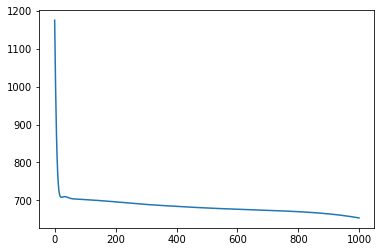

accuracy2: 0.40404040404040403


In [13]:
from sklearn.datasets import make_blobs
from random import randint

def gen_cluster_data(Cv, Lv, Nv, Mv):
    Tr = []
    Ts = []
    C = Cv  # number of categories
    L = Lv   # number of centers
    N = Nv  # number of elements
    M = Mv  # number of dimensions
    X, y = make_blobs(n_samples=N, centers=L, n_features=M,cluster_std=.5, random_state=11)
    cmap = []
    for _ in range(L):
        cmap.append(randint(0,C-1))
    cols = []
    for i in range(N):
        cols.append(cmap[y[i]])
    print(cmap)
    for i in range(int(0.9*N)):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Tr.append(row)
    
    for i in range(int(0.9*N)+1,N):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Ts.append(row)
        
    return (Tr, Ts)


C = 5
M = 4
(T1,T2)  = gen_cluster_data(C, 100, 1000, M)

network = SSNN_network()
#network.init_B(M,2*C,2*C ,0,C)
network.init_B(M,0,3*C ,0,C)
opt_nw = network.train_network( T1, T2, .02, 1000)



[4, 3, 0, 3, 0, 4, 1, 1, 3, 0, 0, 4, 4, 1, 0, 2, 4, 3, 0, 4, 2, 4, 1, 1, 1, 3, 1, 2, 4, 1, 0, 3, 2, 1, 0, 3, 4, 0, 3, 2, 2, 4, 3, 1, 3, 2, 2, 0, 2, 0, 2, 0, 4, 2, 1, 2, 0, 3, 2, 0, 2, 4, 1, 4, 1, 3, 4, 4, 1, 1, 1, 2, 1, 2, 1, 1, 4, 4, 4, 4, 2, 2, 3, 4, 0, 4, 2, 2, 1, 2, 0, 2, 2, 3, 3, 0, 3, 3, 3, 1]
init acc: 0.20202020202020202
min error: 713.7976641937655
accuracy: 0.2828282828282828


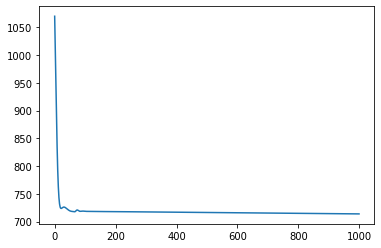

accuracy2: 0.2727272727272727


In [15]:
from sklearn.datasets import make_blobs
from random import randint

def gen_cluster_data(Cv, Lv, Nv, Mv):
    Tr = []
    Ts = []
    C = Cv  # number of categories
    L = Lv   # number of centers
    N = Nv  # number of elements
    M = Mv  # number of dimensions
    X, y = make_blobs(n_samples=N, centers=L, n_features=M,cluster_std=.5, random_state=11)
    cmap = []
    for _ in range(L):
        cmap.append(randint(0,C-1))
    cols = []
    for i in range(N):
        cols.append(cmap[y[i]])
    print(cmap)
    for i in range(int(0.9*N)):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Tr.append(row)
    
    for i in range(int(0.9*N)+1,N):
        row = [X[i,j] for j in range(M)]
        row.append(cols[i])
        Ts.append(row)
        
    return (Tr, Ts)


C = 5
M = 4
(T1,T2)  = gen_cluster_data(C, 100, 1000, M)

network = SSNN_network()
network.init_B(M,3*C, 0 ,0,C)
#network.init_B(M,0,3*C ,0,C)
opt_nw = network.train_network( T1, T2, .02, 1000)

